# Tennis Ace

### Predict the outcome for a tennis player based on their playing habits

[Association of Tennis Professionals Dataset](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals)

Import Modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Initial Inspection

In [5]:
df = pd.read_csv("Data/tennis_stats.csv")
print(F"Columns:\n{df.columns.tolist()}")
print(F"\nShape of DataFrame:\n{df.shape}\n")
df.head()

Columns:
['Player', 'Year', 'FirstServe', 'FirstServePointsWon', 'FirstServeReturnPointsWon', 'SecondServePointsWon', 'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted', 'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved', 'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings', 'Ranking']

Shape of DataFrame:
(1721, 24)



,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [6]:
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

## Identifying the data

- `Player`: Name of tennis player
- `Year`: year data was recorded

#### Service Game Columns (Offensive)

- `Aces`: number of serves by the player where the receiver does not touch the ball
- `DoubleFaults`: number of times player missed both first and second serve attempts
- `FirstServe`: % of first-serve attempts made
- `FirstServePointsWon`: % of first-serve attempt points won by the player
- `SecondServePointsWon`: % of second-serve attempt points won by the player
- `BreakPointsFaced`: number of times where the receiver could have won service game of the player
- `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance
- `ServiceGamesPlayed`: total number of games where the player served
- `ServiceGamesWon`: total number of games where the player served and won
- `TotalServicePointsWon`: % of points in games where the player served that they won

#### Return Game Columns (Defensive)

- `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win
- `SecondServeReturnPointsWon`: % of opponents second-serve points the player was able to win
- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent
- `BreakPointsConverted`: % of the time the player was able to win their opponent’s service game when they had the chance
- `ReturnGamesPlayed`: total number of games where the player’s opponent served
- `ReturnGamesWon`: total number of games where the player’s opponent served and the player won
- `ReturnPointsWon`: total number of points where the player’s opponent served and the player won
- `TotalPointsWon`: % of points won by the player

#### Outcomes

- `Wins`: number of matches won in a year
- `Losses`: number of matches lost in a year
- `Winnings`: total winnings in USD($) in a year
- `Ranking`: ranking at the end of year


Exploratory Data Analysis

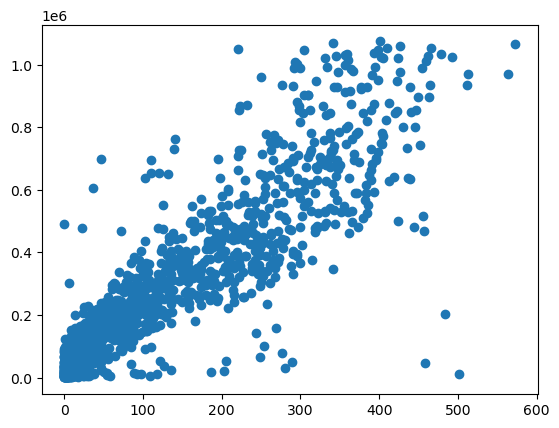

In [7]:
# Plot different features against Winnings column

plt.scatter(df['BreakPointsOpportunities'], df['Winnings'])
plt.show()

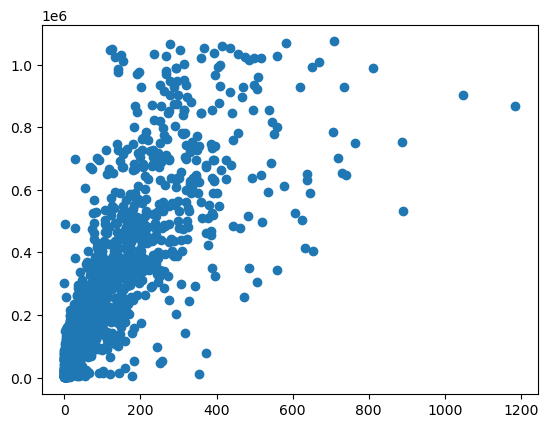

In [8]:
plt.scatter(df['Aces'], df['Winnings'])
plt.show()

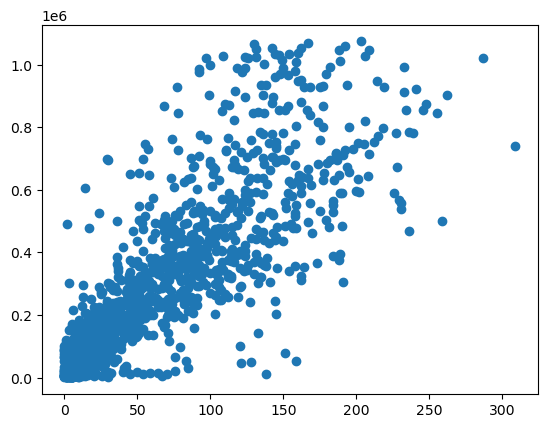

In [9]:
plt.scatter(df['DoubleFaults'], df['Winnings'])
plt.show()

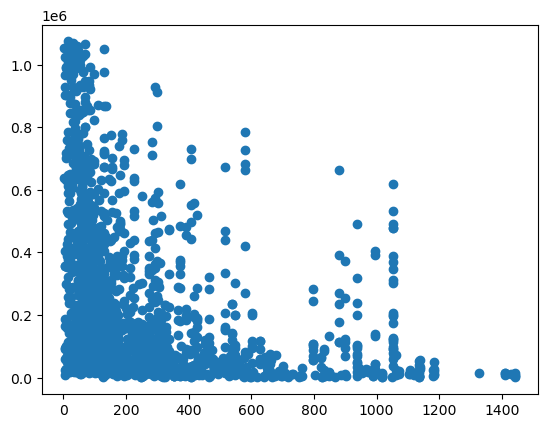

In [10]:
plt.scatter(df['Ranking'], df['Winnings'])
plt.show()

#### Build a single feature linear regression model of the data

Using; `Winnings` & `FirstServeReturnPointsWon`

In [11]:
features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]

In [12]:
# We partition the dataset
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size=0.8)

# Create and fit linear regression model
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [13]:
print(model.score(features_test, outcome_test))

0.048878375766976845


`model.score` is the coefficient of determination $R^2$

$$R^2=1-\frac{u}{v}$$

Where,
- $u=\sum_i(y_{true_{i}} - y_{pred_{i}})^2$ , the residual sum of squares
- $v=\sum_i(y_i-\=y_{i})^2$ , the total sum of the squares

The mean is given $\=y_{i}=\frac{1}{n}\sum_{i=1}^{n}y_i$

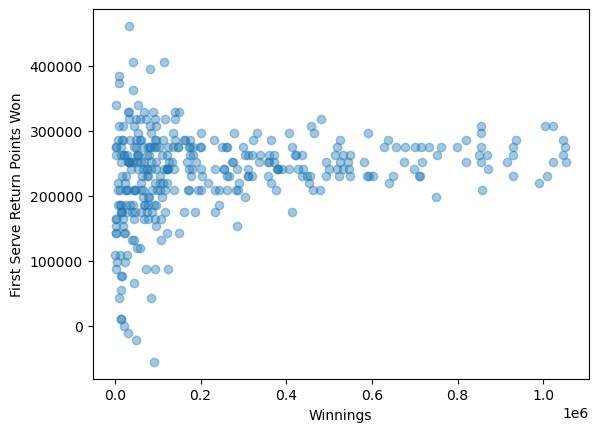

In [14]:
# Prediction

prediction = model.predict(features_test)
plt.scatter(outcome_test, prediction, alpha=0.4)
plt.xlabel("Winnings")
plt.ylabel("First Serve Return Points Won")
plt.show()

----
&nbsp;
# Would like to test more features but really want to write an interation to do them all at once...